# Bike Sharing Analysis with Ford GoBike Data

## By Mr. Sadiq Ghalib

## Introduction  

> Over the past decade, bicycle-sharing systems are growing in variety and recognition in cities across the globe.
Bicycle-sharing systems enable users to rent bicycles for brief visits, usually half-hour or less.
Thanks to the increase in info technologies, it's simple for a user of the system to access a dock at intervals the system to unlock or come bicycles.
These technologies additionally give a wealth of knowledge that may be wont to explore however these bike-sharing systems area unit used.
In this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider.

## Preliminary Wrangling  

It's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in from 2017 to November, 2018.  

Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html

In [2]:
# Import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [4]:
# Download the dataset with pandas *From burakgunbatan GitHub*
folder_name_of_csvs = 'Project_files'

makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # Code below opens zip file; BytesIO returns a readable and writable view of the contents
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # Extracted the zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [6]:
# Merge all locally saved CSVs into One DataFrame
all_files = []
for file_name in listdir(folder_name_of_csvs):
    all_files.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
dataFrame = pd.concat(all_files)

In [8]:
# Save DataFram to data.csv
dataFrame.to_csv('mergeData.csv')

In [9]:
# Examine DataFrame
dataFrame = pd.read_csv('mergeData.csv')

In [10]:
len(dataFrame)

2252058

Text(0.5, 0, 'Age bike riders')

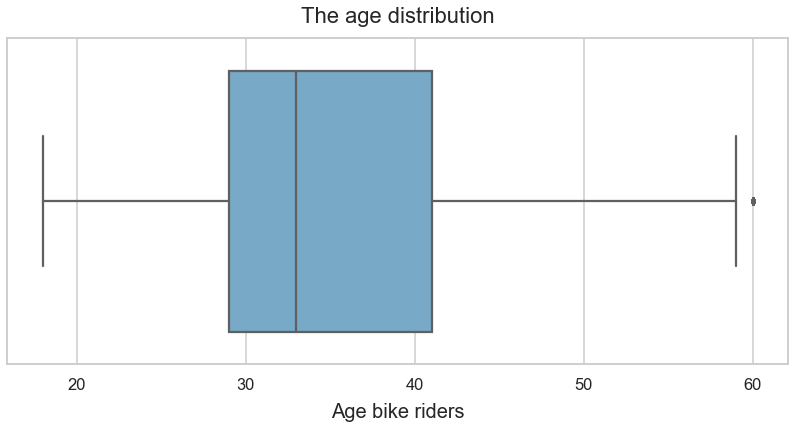

In [56]:
# Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

# Filter data to include reasonable member age range
dataFrame['member_age'] = 2018-dataFrame['member_birth_year']

plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=dataFrame, palette='Blues', orient='h')
plt.title("The age distribution", fontsize=22, y=1.03)
plt.xlabel("Age bike riders", fontsize=20, labelpad=10)

> As we notice in the distribution graph, ages between 18 to 60 represent 95% of the users. There were users more than 60 years old but they represent a small percentage. 
So, we can remove users more than 60 years old.

In [23]:
dataFrame = dataFrame[dataFrame['member_age']<=60]

In [24]:
dataFrame['member_age'].mean()

34.783988359178586

> Ford bike users' median user age is around from 34 to 35.

In [25]:
# Filter data only to include San Francisco rides
max_longitude_sf = -122.3597
min_longitude_sf = -122.5147
max_latitude_sf = 37.8121
min_latitude_sf = 37.7092

In [28]:
end_station_latitude_mask = (dataFrame['end_station_latitude']>=min_latitude_sf) & (dataFrame['end_station_latitude']<=max_latitude_sf)
start_station_latitude_mask = (dataFrame['start_station_latitude']>=min_latitude_sf) & (dataFrame['start_station_latitude']<=max_latitude_sf)

end_station_longitude_mask =(dataFrame['end_station_longitude']>=min_longitude_sf) & (dataFrame['end_station_longitude']<=max_longitude_sf)
start_station_longitude_mask = (dataFrame['start_station_longitude']>=min_longitude_sf) & (dataFrame['start_station_longitude']<=max_longitude_sf)

In [29]:
dataFrame = dataFrame[end_station_latitude_mask & start_station_latitude_mask & end_station_longitude_mask & start_station_longitude_mask]

In [30]:
len(dataFrame)

1505886

> Now the data size became around (1,505,886) from (2,252,058).

### What is the structure of your dataset?

> There is 1505886 trip in the dataset with 16 columns, and different variable types like (int - float - string - bool) but the most type are numeric.

### What is/are the main feature(s) of interest in your dataset?

> There is many like:  
- Gender  
- Average riding duration  
- Average riding distance  
- Age groups of users 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the age group, gender, duration of use and purpose of use are the most important data to focus on.

## Univariate Exploration

In [32]:
# Create new fields for date from start_time and end_time
dataFrame['start_time'] = pd.to_datetime(dataFrame['start_time'])
dataFrame['end_time'] = pd.to_datetime(dataFrame['end_time'])

dataFrame['start_time_date'] = dataFrame['start_time'].dt.date
dataFrame['end_time_date'] = dataFrame['end_time'].dt.date

dataFrame['start_time_year_month'] = dataFrame['start_time'].map(lambda x: x.strftime('%Y-%m'))
dataFrame['end_time_year_month'] = dataFrame['end_time'].map(lambda x: x.strftime('%Y-%m'))

dataFrame['start_time_year_month_renamed'] = dataFrame['start_time'].dt.strftime('%y' + '-' + '%m')

dataFrame['start_time_year'] = dataFrame['start_time'].dt.year.astype(int)
dataFrame['end_time_year'] = dataFrame['end_time'].dt.year.astype(int)

dataFrame['start_time_month'] = dataFrame['start_time'].dt.month.astype(int)
dataFrame['end_time_month'] = dataFrame['end_time'].dt.month.astype(int)

dataFrame['start_time_hour_minute'] = dataFrame['start_time'].map(lambda x: x.strftime('%H-%m'))
dataFrame['end_time_hour_minute'] = dataFrame['end_time'].map(lambda x: x.strftime('%H-%m'))

dataFrame['start_time_hour'] = dataFrame['start_time'].dt.hour
dataFrame['end_time_hour'] = dataFrame['end_time'].dt.hour

dataFrame['start_time_weekday'] = dataFrame['start_time'].dt.weekday_name
dataFrame['end_time_weekday'] = dataFrame['end_time'].dt.weekday_name

dataFrame['start_time_weekday_abbr'] = dataFrame['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
dataFrame['end_time_weekday_abbr'] = dataFrame['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

# Create a new field for member age group from member_age_bin
dataFrame['member_age_bins'] = dataFrame['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

# Create minutes for trip duration from duration_sec
dataFrame['duration_min'] = dataFrame['duration_sec']/60

# Create new fields for distance
def distance(origin, destination):
    firstLat, firstlon = origin
    secondistanceLat, secondistanceLon = destination
    radiusValue = 6371

    distanceLat = math.radians(secondistanceLat - firstLat)
    distanceLon = math.radians(secondistanceLon - firstlon)
    firstValue = (math.sin(distanceLat / 2) * math.sin(distanceLat / 2) +
         math.cos(math.radians(firstLat)) * math.cos(math.radians(secondistanceLat)) *
         math.sin(distanceLon / 2) * math.sin(distanceLon / 2))
    secondValue = 2 * math.atan2(math.sqrt(firstValue), math.sqrt(1 - firstValue))
    result = radiusValue * secondValue

    return result
	
dataFrame['distance_km_estimates'] = dataFrame.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
dataFrame['distance_miles_estimates'] = dataFrame['distance_km_estimates']*0.621371

### Average count of rides per bike per day
I selected August in order to compare the data findings because it is in the summer season.

In [33]:
count_rides = dataFrame.groupby('start_time_year_month_renamed')['bike_id'].size().reset_index()
count_unique_rides = dataFrame.groupby('start_time_year_month_renamed')['bike_id'].nunique().reset_index().rename(columns={'bike_id':'unique_bike_id'})
count_rides_dataFrame = count_rides.merge(count_unique_rides, on='start_time_year_month_renamed')
count_rides_dataFrame['number_of_used'] = count_rides_dataFrame['bike_id']/count_rides_dataFrame['unique_bike_id']
Aug_2017_AVG_BikeUsed = (count_rides_dataFrame[count_rides_dataFrame['start_time_year_month_renamed']=='17-08']['number_of_used'].mean())/31
Aug_2018_AVG_BikeUsed = (count_rides_dataFrame[count_rides_dataFrame['start_time_year_month_renamed']=='18-08']['number_of_used'].mean())/31


In [34]:
print(Aug_2017_AVG_BikeUsed, Aug_2018_AVG_BikeUsed)

1.1737976638461707 2.6237395924856703


In [35]:
print(Aug_2018_AVG_BikeUsed/Aug_2017_AVG_BikeUsed)

2.2352571259074496


As we see these two months in different years, the average increased 2.23 times in August 2018, where the average count of rides per bike per day reaches (2.6237).

### Count of daily bike rides from July 2017 to November 2018

In [36]:
def transform_axis(dailyBike, pos):
    if dailyBike >= 1000:
        value = int(dailyBike/1000)
        return '{:d}K'.format(value)
    elif dailyBike >= 1000000: 
        value = int(dailyBike/1000000)
        return '{:d}M'.format(value)
    else:
        return int(dailyBike)

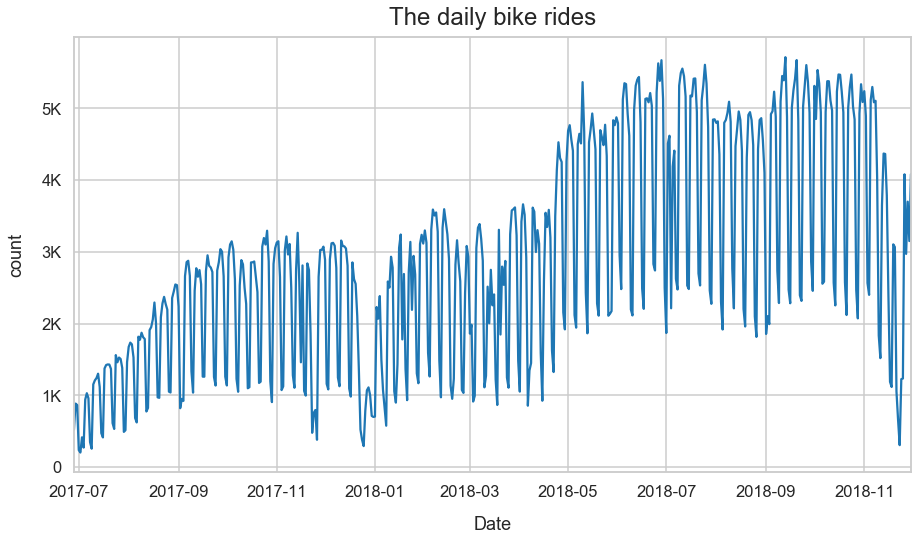

In [42]:
dataFrame.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(15,8))
plt.title('The daily bike rides', fontsize=24, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('count', labelpad=16)
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))

> Compared to the beginning of July 2017, where daily trips were less than 1000, it increased to more than 5000 after less than a year (June 2018) There is huge decrease around January 2018 and November 2018 because it's too cold. these on start Winter session time.

### Count of people who took bike rides by age group per month

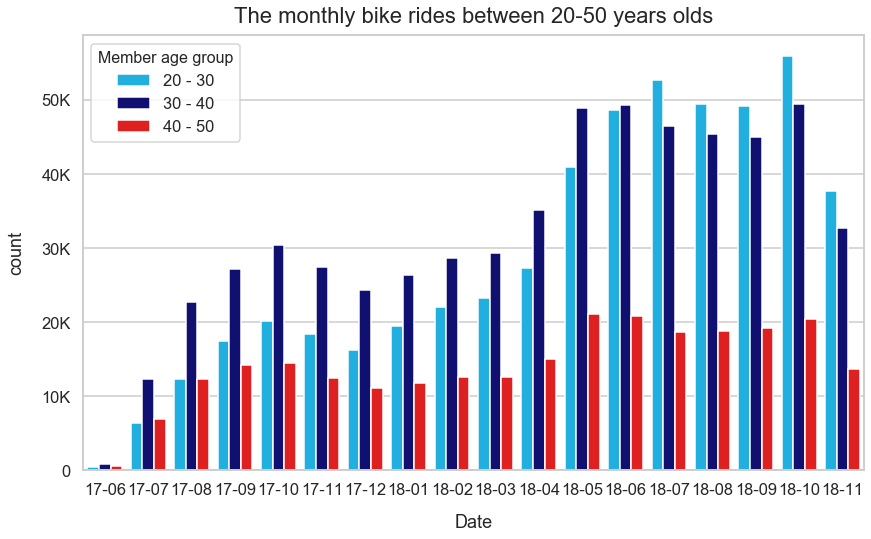

In [43]:
plt.figure(figsize=(14,8))
palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'red'}
axis = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=palette, data=dataFrame[dataFrame['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly bike rides between 20-50 years olds', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('count', labelpad=16)
leg = axis.legend()
leg.set_title('Member age group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))

> 20-30 years old users are rapidly growing compared to other user groups. When the service first started 30-40 years old users were dominant, however 20-30 years old users became a leader in a year.

### Bike rides per gender

(0, 100)

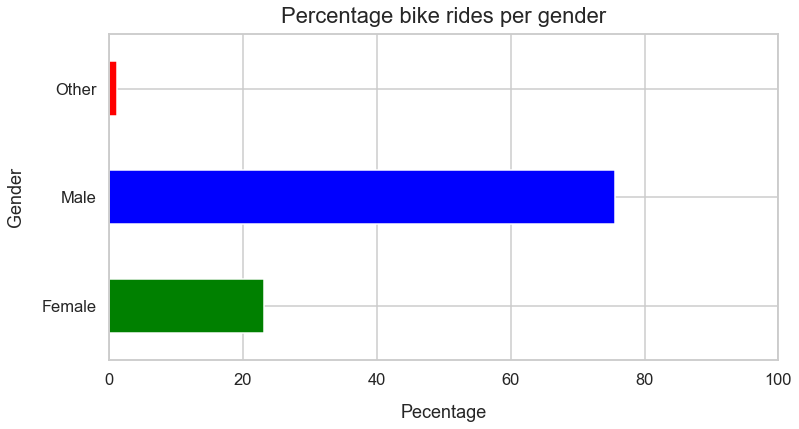

In [44]:
gender_trips = dataFrame.groupby('member_gender').agg({'bike_id':'count'})
gender_trips['perc'] = (gender_trips['bike_id']/gender_trips['bike_id'].sum())*100

colors = ['green', 'blue', 'red']
gender_trips['perc'].plot(kind='barh', color=colors, figsize=(12,6))
plt.title('Percentage bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('Gender', labelpad=16)
plt.xlabel('Pecentage', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

> Male took around %76 of all bike rides, and female took around %22 of them.

### Bike rides per weekday

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

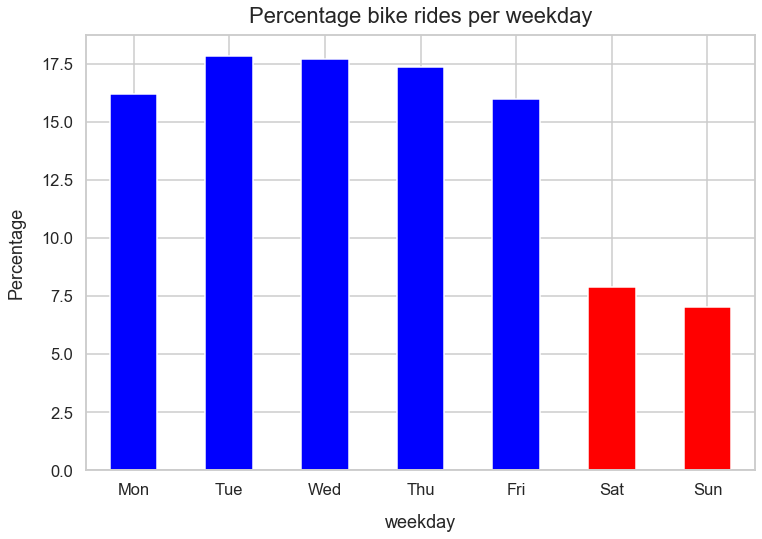

In [45]:
weekday_trips = dataFrame.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
weekday_trips['perc'] = (weekday_trips['bike_id']/weekday_trips['bike_id'].sum())*100
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red']
weekday_trips.reindex(weekday_index)['perc'].plot(kind='bar', color=colors, figsize=(12,8), legend=False)
plt.title('Percentage bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('Percentage', labelpad=16)
plt.xticks(rotation=360)


> People use this service on weekdays more than weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I made some calculations to prepare the data to be placed in the graphs because the data is not ready to be used directly.
After viewing the graphs we draw the following observations:
- 20-30 years old users are rapidly growing compared to other user groups.
- 20 to 40 years old people took the more than %70 of bike rides.
- Among those, 30 to 40 years old people's rides account almost %40 of all bike rides.
- Male took around %76 of all bike rides, and female took around %24 of them.
- People use this service on weekdays more than weekends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I will summarize the work as points:
- At the beginning I conducted a filter on the ages of members and through the graph I concluded that the age range starts from 18 years to less than 140 years, but the vast majority, which represents about 95% is between 18 years to 60 years, so I focused on this range for a number of reasons, the data provide a lot, which represents 95% and also to exclude extreme values.
- I have created new fields such as (timing - age groups - duration) to facilitate the conduct of mathematical calculations and understand the data in a better way.
- The service is spread in more than one city such as (Oakland - San Jose - San Francisco), which makes it difficult to represent data traffic in all cities, and to simplify the matter chose the city of San Francisco by determining the coordinates of the city by looking at the data and the use of some sites on the Internet.

## Bivariate Exploration

### User trends of bike rides of subscribers vs customers

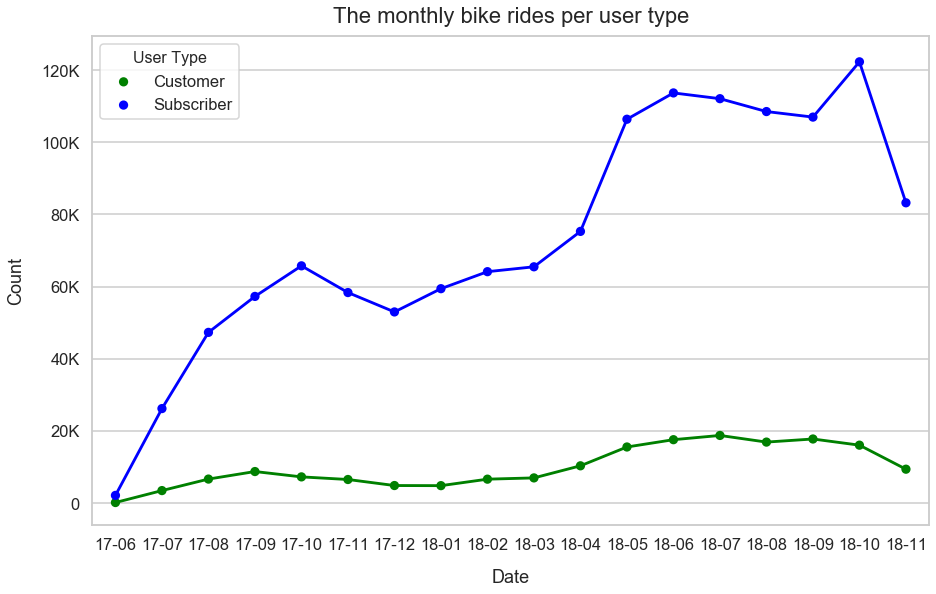

In [46]:
user_type_count = dataFrame.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

plt.figure(figsize=(15,9))
palette = {'Subscriber':'blue', 'Customer':'green'}
axis = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=palette, scale=.7, data=user_type_count)
plt.title('The monthly bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)
leg = axis.legend()
leg.set_title('User Type',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))


**Customers' rides seem increasing slightly.**

**But there is a decrease in November 2018 for subscribers but it seems like it is related with the winter season.**

### Average trip duration of subscribers vs customers

Text(0.5, 0, 'trip duration in minutes')

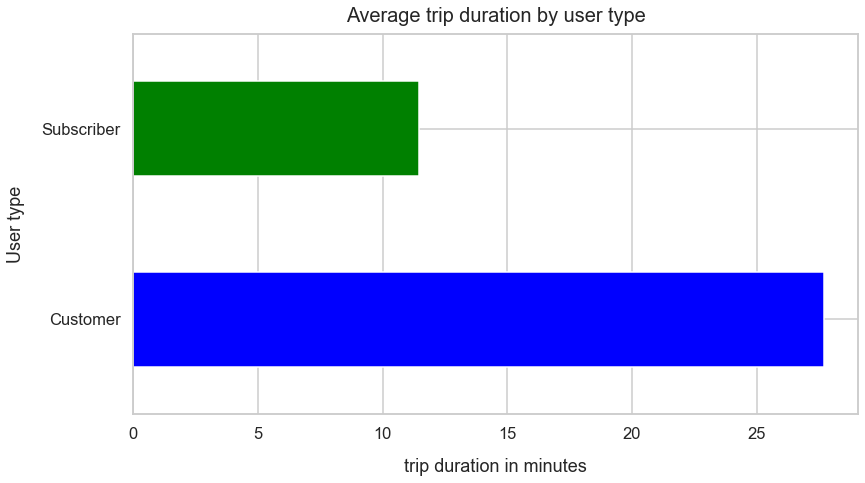

In [47]:
colors=['blue', 'green']
axis = dataFrame.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=colors, figsize=(13,7))
axis.set_title('Average trip duration by user type', fontsize=20, y=1.015)
axis.set_ylabel('User type', labelpad=16)
axis.set_xlabel('trip duration in minutes', labelpad=16)

**Subscribers' average trip duration is ~ 11 minutes.**

**Customers' average trip duration is ~ 28 minutes.**

### The trend of subscribers' bike rides per age group

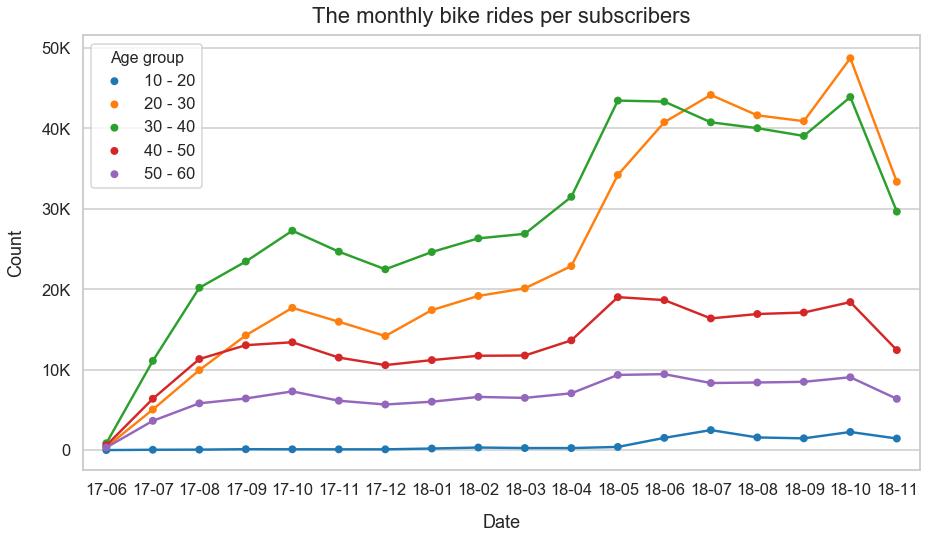

In [50]:
subscriber_age = dataFrame[dataFrame['user_type']=='Subscriber'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(15,8))
axis = sns.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', scale=.6, data=subscriber_age)
plt.title("The monthly bike rides per subscribers", fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)
leg = axis.legend()
leg.set_title('Age group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))


**As we can see from the chart of the participants there is a convergence between the age groups (20-30) and (30-40), the same applies to the age categories (40-50) and (50-60), while the category (10-20) is considered Least among the age groups.**

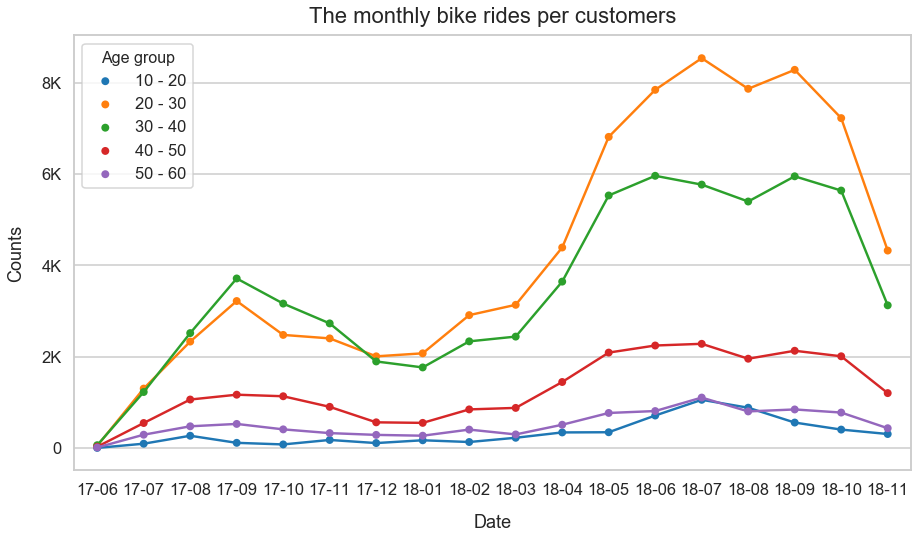

In [51]:
customer_age = dataFrame[dataFrame['user_type']=='Customer'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(15,8))
axis = sns.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', scale=.6, data=customer_age)
plt.title("The monthly bike rides per customers", fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Counts', labelpad=16)
legs = axis.legend()
legs.set_title('Age group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))


**As we can see from the chart of the participants there is a convergence between the age groups (20-30) and (30-40), but the age categories (40-50) is less than previous categories, while the category (10-20) and (50-60)  is considered Least among the age groups.**

### Which age group would prefer electric biking more.

**We know that the company launched the bicycle project on (April 24th, 2018) assume that electric bikes were added in the same week.**

In [52]:
nonelectric_bike = dataFrame[dataFrame['start_time'] < pd.Timestamp(2018,4,24)]['bike_id'].unique()

electric_bike = []
for bike_id in dataFrame[(dataFrame['start_time'] > pd.Timestamp(2018, 4, 24)) & (dataFrame['start_time'] < pd.Timestamp(2018, 5, 24))]['bike_id']: 
    if bike_id not in nonelectric_bike and bike_id not in electric_bike:
        electric_bike.append(bike_id)
		
len(electric_bike)

313

**Electric bike rides vs regular bike ride for the first month.**

In [53]:
dataFrame['electric_bike'] = dataFrame['bike_id'].isin(electric_bike)
(dataFrame['electric_bike'].value_counts()/dataFrame['electric_bike'].value_counts().sum())*100

False    91.923758
True      8.076242
Name: electric_bike, dtype: float64

> Results:
- 91.9% of rides are non-electric bike rides.
- 8.1% of rides are electric bike rides.

**There is a big difference between electric bike and regular bike riding.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85.
Customers' rides seem increasing slightly. There is a decrease in November 2018 for subscribers but it seems like it is related with the winter season.
Subscribers' average trip duration is around 11 minutes. Customers' average trip duration is around 28 minutes.
Subscribers and customers trip distance was about the same, which is slightly more than one mile.
I selected the most popular group 20-40 years old people in order to compare hiring days, time of the day, peak times, etc.
Subscribers are most frequently used this service around 7-9 am and 4-6 pm. Customers have used this service at the weekend around (10 am - 5 pm) and weekday 5pm6pm. Customers use this service during the weekend for leisure and weekdays after work.
On the other hand, I checked the electrical bike program. Ford GoBike announced the launch of electric bikes as April 24th, 2018. 91.9% of rides are non-electric bike rides. Electric bike rides account for 8.1% of the total rides in the first month. It was increased suddenly at the beginning of the program launch. There is a huge spike at the end of April. After that, it seems the usage trend for electric bikes is decreasing.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that at the beginning of the electrical bike hiring program launch there was a high demand for this program. But after a while, it was decreased suddenly. Customers and subscribers may be more comfortable to drive a normal or random bike rather than an electrical and advanced technological bike.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

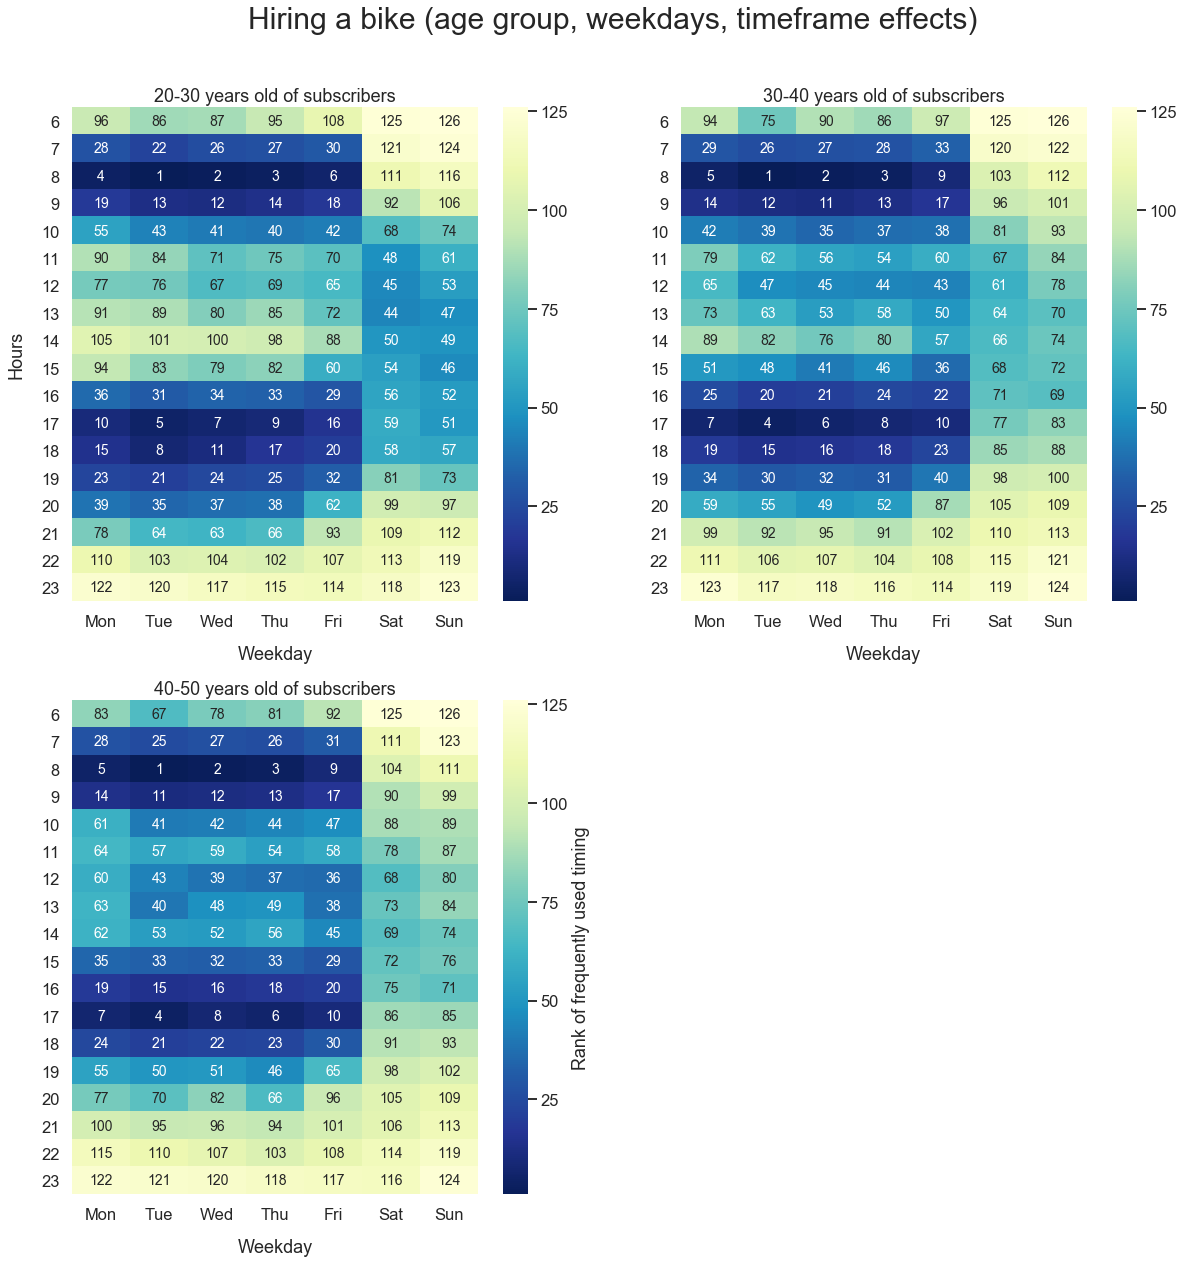

In [55]:
subscriber_hour_dataFrame = dataFrame[(dataFrame['member_age']>=20) & (dataFrame['member_age']<40) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_hour_2 = dataFrame[(dataFrame['member_age']>=20) & (dataFrame['member_age']<30) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_3 = dataFrame[(dataFrame['member_age']>=30) & (dataFrame['member_age']<40) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_4 = dataFrame[(dataFrame['member_age']>=40) & (dataFrame['member_age']<50) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_2['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_2['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_3['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_3['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_4['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_4['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_2['count_perc'] = subscriber_hour_2['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)

subscriber_hour_3['count_perc'] = subscriber_hour_3['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)

subscriber_hour_4['count_perc'] = subscriber_hour_4['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)

subscriber_hour_2['rank'] = subscriber_hour_2['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_3['rank'] = subscriber_hour_3['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_4['rank'] = subscriber_hour_4['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_dataFrame_pivoted2 = subscriber_hour_2.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

subscriber_hour_dataFrame_pivoted3 = subscriber_hour_3.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

subscriber_hour_dataFrame_pivoted4 = subscriber_hour_4.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')


plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle('Hiring a bike (age group, weekdays, timeframe effects)', fontsize=30, y=0.95)
sns.heatmap(subscriber_hour_dataFrame_pivoted2, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subscriber_hour_dataFrame_pivoted3, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subscriber_hour_dataFrame_pivoted4, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of motorbike hiring with three totally different variables like people, timeframe, weekday. The variable exploration here showed ME that folks World Health Organization are older than the others have longer to drive a motorcycle instead of tykes. 20-30 years previous individuals are active once the time is commute like they drive a motorcycle once they head to their offices or come to their homes. These figures show the United States of America after we grow up, we are able to see that they drive these bikes when during a day like in lunch period or within the morning or within the afternoon. it's going to be associated with their retirement or older individuals have far more versatile operating hours instead of youngers.

### Were there any interesting or surprising interactions between features?

> I was interested and conjointly shocked as a result of I didn't expect to ascertain this sort of figures for 40-50 years previous cluster. i used to be expecting to ascertain abundant less hiring quantities in an exceedingly day however these figures show that area unit|they're} active and that they are versatile instead of youngers.

## Conclusion

> There have been 3.31 billion rides.
20-30 years previous users ar speedily growing compared to alternative user teams. once the service 1st started 30-40 years previous users were dominant, but 20-30 years previous users became a frontrunner during a year.
20 to 40 years previous individuals took the quite p of motorbike rides. Among those, 30 to 40 years previous people's rides account almost of all bike rides.
Male took around %76 of all bike rides, and female took around %24 of them.
People use this service on weekdays quite weekends.
8 am and 5 pm ar the peak hours for this service. Also, individuals use this service once they are in mealtime similarly.
Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85.
Customers' rides appear increasing slightly however subscribers' rides reached 6 times more than customers' on Oct 2018. there's a decrease in Nov 2018 for subscribers however it feels like it's connected with the winter season.
Subscribers' average trip length is around 11 minute. Customers' average trip length is around 28 minutes.
Subscribers and customers trip distance was regarding constant, that is slightly quite one mile.
90% of motorbike riders turn up on a weekday.
The peak bike rides time for all members is around commute time.

> Finally, it looks that 40 to 50 years old age group use the service the foremost.
After Ford GoBike did a pilot launch of e-bike on April 24th, 2018,  there is quite a ton of electrical bike rides similarly, that reached to 10% of daily rides at the tip of July 2018. However, daily electrical bike rides are on a downward trend.


## Sources
-   [burakgunbatan GitHup](http://j.mp/2kERqLn)
-   [FordGoBike Data Set](https://www.fordgobike.com/)
-   [Haversine formula](https://www.movable-type.co.uk/scripts/latlong.html)  used to calculate distances using latitude and longitude
-   [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)  documentation
-   [Matplotlib histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)  documentation
-   [IPython Display](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html)  documentation
-   [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)  documentation and  [tutorial](https://likegeeks.com/seaborn-heatmap-tutorial/)